<a href="https://colab.research.google.com/github/MoLo404Ko/python_writehand_numbers/blob/main/handwrite_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#ЗАДАЧА: РАСПОЗНАВАТЬ РУКОПИСНЫЕ ЦИФРЫ 28x28 РАЗМЕРОМ В ЧБ ФОРМАТЕ
#ДЛЯ РАСПОЗНАВАНИЯ ХОРОШО ПОДХОДЯТ СВЕРТОЧНЫЕ СЕТИ, НО Т.К. О НИХ Я ЕЩЕ НЕ ЗНАЮ,
#ТО БУДУ ИСПОЛЬЗОВАТЬ ПОЛНОСВЯЗНУЮ

#НС БУДЕТ ИМЕНТЬ 784 ВХОДА (28*28), 128 НЕЙРОНОВ СКРЫТОГО СЛОЯ И 10 ВЫХОДОВ
#ДЛЯ СКРЫТОГО СЛОЯ ИСПОЛЬЗУЕМ RELU, А ДЛЯ ВЫХОДНОГО softmax, т.к. БУДЕМ ПРЕД-
#СТАВЛЯТЬ РЕЗУЛЬТАТ В ВИДЕ ИНТЕРПРЕТАЦИИ ВЕРОЯТНОСТИ,Т.Е. ЧИСЛОМ

#КОЛИЧЕСТВО СЛОЕВ И НЕЙРОНОВ В НИХ ВЫБИРАЮТСЯ ЭМПИРИЧЕСКИМ ПУТЕМ
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загрузка обучающей и эталонной выборок

In [6]:
#mnist - датасет из рукописных цифр
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Нормализация входных данных

In [7]:
#Для того чтобы данные находились в диапазоне от 0 до 1, мы их стандатизируем
#Списки содержат матрицы, числа в которых от 0 до 255 в градации серого, т.е.,
#нам нужно их разделить на максимум, чтобы числа входили в диапазон
x_train = x_train / 255
x_test = x_test / 255

#Далее необходимо привести выходные данные в нужный формат, т.к. у нас 10 выходов,
#то мы должны получать массив из 10 элементов, где каждый элемент под определенным
#индексом обозначает нужное число.
#to_categorical - приводит в нужный формат, где 10 - длина вектора
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Формируем модель НС

In [8]:
model = keras.Sequential(
    [
        #Входной слой размером 784 с 1 байтом под ЧБ формат (0-255)
        #Преобразуем матрицу 28x28
        Flatten(input_shape=(28,28,1)),
        #Создаем 128 нейронов в скрытом слое
        Dense(128, activation="relu"),
        #Создаем 10 нейронов для выходного слоя
        Dense(10, activation="softmax")
    ]
)
#Выводит информацию о модели, где Param - количество связей между нейронами
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Компилируем модель с оценочной функцией и оптимизатором

In [11]:
#metrics - метрика, в которой получаем результат, accuracy - показывает резуль-
#тат в виде того, как часто происходит совпадение с критерием оценки в %
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Запуск обучения модели

In [12]:
#validation_split -  разбивает выборку в соотношении 80% к 20% на обучающую и
#эталонную выборки соответственно
model.fit(x_train, y_train_cat, batch_size=40, epochs=5, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 6s 4ms/step - loss: 0.2957 - accuracy: 0.9154 - val_loss: 0.1574 - val_accuracy: 0.9550
Epoch 2/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1300 - accuracy: 0.9622 - val_loss: 0.1256 - val_accuracy: 0.9636
Epoch 3/5
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0904 - accuracy: 0.9734 - val_loss: 0.0981 - val_accuracy: 0.9714
Epoch 4/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0672 - accuracy: 0.9810 - val_loss: 0.0951 - val_accuracy: 0.9714
Epoch 5/5
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0915 - val_accuracy: 0.9726


Работа НС на эталонной выборке

In [13]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9735


[0.0859198272228241, 0.9735000133514404]

Проверка распознавания цифр

1/1 [==============================] - 0s 101ms/step
[[4.8634770e-06 9.9859053e-01 1.7650989e-04 2.9174880e-05 1.8005365e-05
  1.0821011e-05 2.5361694e-05 8.9232693e-04 2.5105468e-04 1.2871847e-06]]
Распознанная цифра: 1


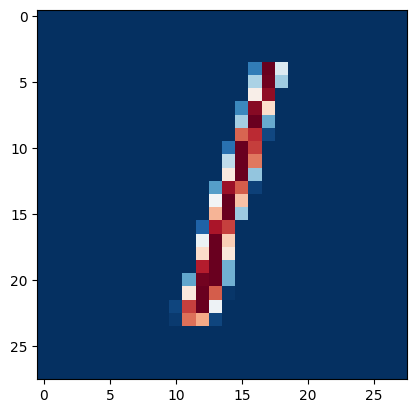

In [27]:
n = 2
#expand_dims - расширяет форму входного массива
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
#argmax - бер индекс максимального значения
print(f"Распознанная цифра: {np.argmax(res)}")

#cmap - цвтовая карта, в которой выводится изображение, мы берем бинрную,
#т.е. белый-черный
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки

In [34]:
pred = model.predict(x_test)
#axis=1 - ось x
pred = np.argmax(pred, axis=1)
print(pred[20:60])
print(y_test[20:60])

313/313 [==============================] - 1s 2ms/step
[9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4
 1 9 5]
[9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4
 1 9 5]


Выделение неверных ответов

In [38]:
#Переменная mask принимает значения, удовлетворяющие условию pred==y_test
mask = pred == y_test
print(mask)
#Выделяем индексы, по которым mask содержит true и инверсируем, чтобы получить
#индексы false
x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false)
print(p_false)

[ True  True  True ...  True  True  True]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

Вывод неверных изображений

Значение сети: 6


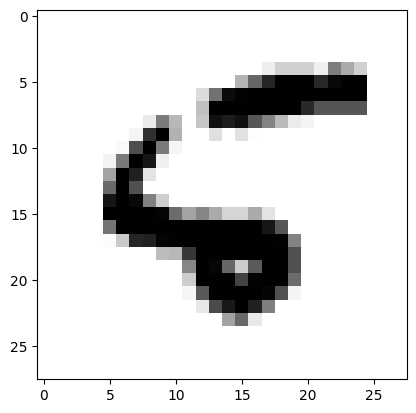

Значение сети: 9


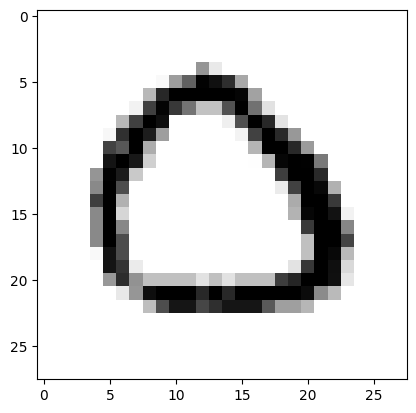

Значение сети: 3


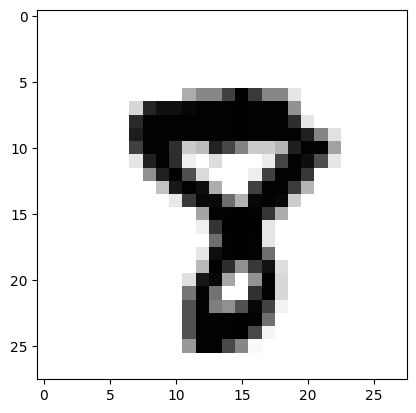

Значение сети: 2


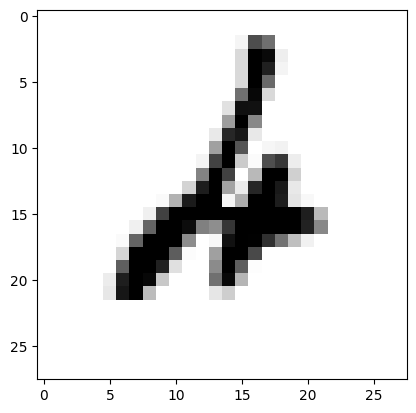

Значение сети: 0


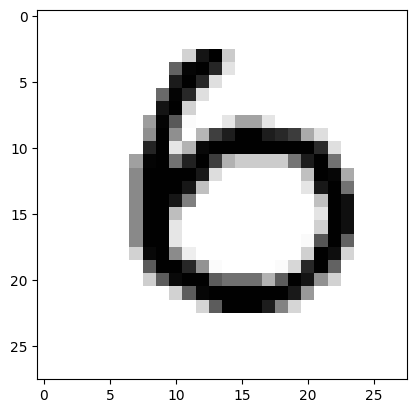

In [37]:
for i in range(5):
  print("Значение сети: " + str(p_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()